In [1]:
import geopandas
import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
ftype = 'county'
files = glob.glob(f'{ftype}/*.shp')
print(files)

['county/tl_2021_us_county.shp']


In [15]:


# files = ['/home/shumway743/cis5500_group/geo/state/tl_2021_us_state.shp']
dfs = []
for file in files:
    shp_file = geopandas.read_file(file)
    shp_file1 = shp_file.simplify(tolerance=.01)
    shp_file['simple'] = shp_file1
    shp_file['geojson'] = shp_file.simple.apply(lambda x: geopandas.GeoSeries([x]).to_json())
    shp_file = shp_file.drop(['geometry','simple'],axis=1)
    dfs.append(shp_file)
    # shp_file1.to_file(file + '_simple.geojson', driver='GeoJSON')

df = pd.concat(dfs)

In [9]:
df.count()

STATEFP     3234
COUNTYFP    3234
COUNTYNS    3234
GEOID       3234
NAME        3234
NAMELSAD    3234
LSAD        3234
CLASSFP     3234
MTFCC       3234
CSAFP       1256
CBSAFP      1916
METDIVFP     110
FUNCSTAT    3234
ALAND       3234
AWATER      3234
INTPTLAT    3234
INTPTLON    3234
geojson     3234
dtype: int64

In [10]:
data = pd.read_csv(f'/home/shumway743/cis5500_group/census/data/backup/{ftype}_2021_census_api_p.csv')
data['GEOID'] = data.GEO_ID.apply(lambda x: x.split('US')[-1])
# df.STATEFP = df.STATEFP.astype(int)
merged = df.merge(data[['GEO_ID','GEOID']],on='GEOID')

merged.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geojson,GEO_ID
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477645345,10690204,+41.9158651,-096.7885168,"{""type"": ""FeatureCollection"", ""features"": [{""i...",0500000US31039
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680976231,61568965,+46.2946377,-123.4244583,"{""type"": ""FeatureCollection"", ""features"": [{""i...",0500000US53069
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"{""type"": ""FeatureCollection"", ""features"": [{""i...",0500000US35011
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,NaN,A,2169272970,22847034,+40.7835474,-096.6886584,"{""type"": ""FeatureCollection"", ""features"": [{""i...",0500000US31109
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"{""type"": ""FeatureCollection"", ""features"": [{""i...",0500000US31129


In [ ]:
tmp = df.merge(data[['GEO_ID','GEOID']],on='GEOID',how='left')
tmp[tmp.GEO_ID.isnull()]

In [14]:

merged['type']=ftype
out = merged[['GEO_ID','type','geojson']].rename({'GEO_ID':'geo_id'},axis=1).set_index('geo_id')
out.to_csv(f'geo_out_{ftype}.csv')

<Axes: >

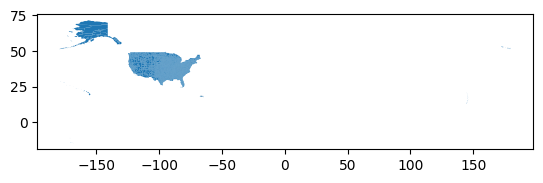

In [16]:
df.simple.plot()